In [1]:
import numpy as np
import cv2
import numpy as np 
from matplotlib import pyplot as plt

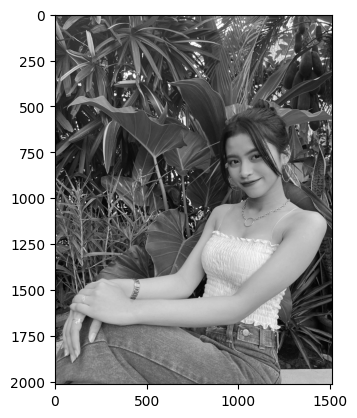

In [2]:
img = cv2.imread("img/img.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

0


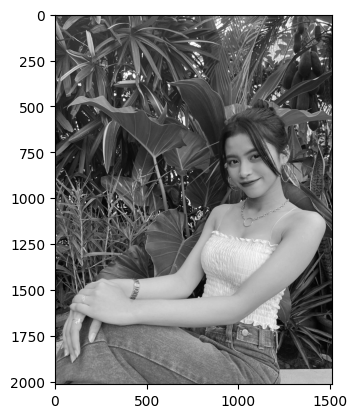

100


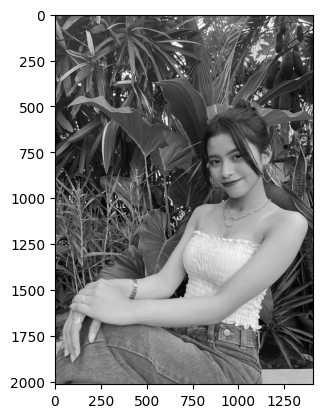

200


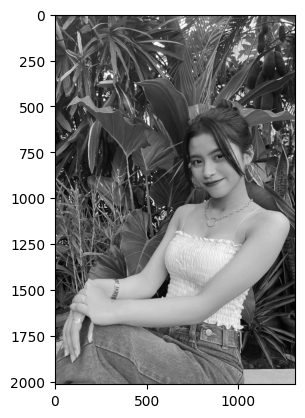

300


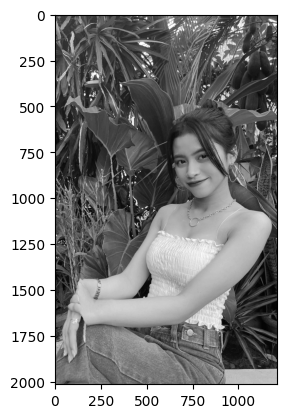

400


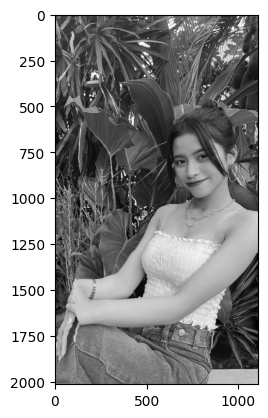

500


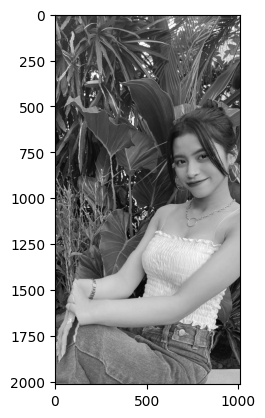

600


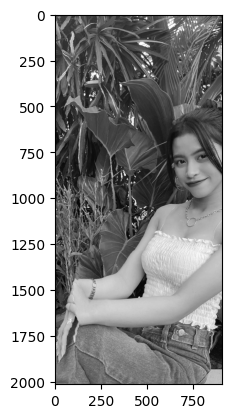

700


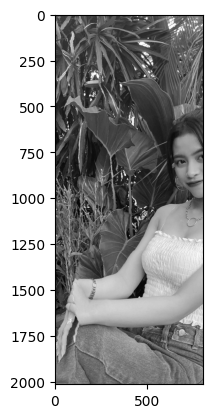

800


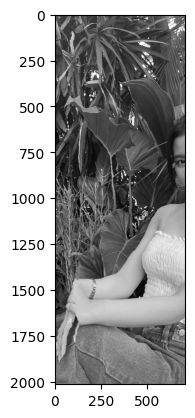

900


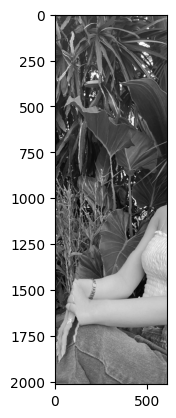

In [3]:
def seam_carving(img):
    def derivative(X, direction):
        if(direction == 0):
            for idx in range(X.shape[0] - 1):
                X[idx,0:X.shape[1]] = X[idx, 0:X.shape[1]] - X[idx + 1, 0:X.shape[1]]
        else:
            for idx in range(X.shape[1] - 1):
                X[0:X.shape[0], idx] = X[0:X.shape[0], idx] - X[0:X.shape[0], idx + 1]
        return X
        
    imgX = derivative(img.copy(), 0)
    imgY = derivative(img.copy(), 1)

    def energy(X, Y):
        D = X[:] + Y[:]
        return D

    energy_matrix = np.array(energy(imgX, imgY))

    M = [[0 for x in range(img.shape[1])] for y in range(img.shape[0])]
    for idy in range(img.shape[1]):
        M[0][idy] = energy_matrix[0][idy]
    for idx in range(1,img.shape[0]):
        for idy in range(img.shape[1]):
            v1 = M[idx-1][idy] if idx-1 >= 0 else 10000000
            v2 = M[idx-1][idy-1] if idx -1 >= 0 and idy - 1 > 0 else 10000000
            v3 = M[idx-1][idy+1] if idx -1 >= 0 and idy + 1 < img.shape[1] else 10000000
            M[idx][idy] = min(v1,v2,v3) + int(energy_matrix[idx][idy])
    idy = 0
    val = 1000000000
    t = img.shape[0] - 1
    for id in range(img.shape[1]):
        if M[t][id] < val:
            val = M[t][id]
            idy = id
    seam_path = [[0 for x in range(img.shape[1])] for y in range(img.shape[0])]
    while (t > 0 and idy < img.shape[1] and idy > 0):
        seam_path[t][idy] = 255 
        v1 = M[t-1][idy] if t - 1 >= 0 else 10000000
        v2 = M[t-1][idy-1] if t -1 >= 0 and idy - 1 > 0 else 10000000
        v3 = M[t-1][idy+1] if t -1 >= 0 and idy + 1 < img.shape[1] else 10000000
        t -= 1
        if(v1 > v2 and v1 > v3):
            continue
        if(v2 > v1 and v2 > v3):
            idy -= 1
            continue
        if(v3 > v1 and v3 > v2):
            idy += 1  
            continue
    
    result = img.copy()
    for idx in range(result.shape[0]):
        flag = False
        for idy in range(result.shape[1]):
            if seam_path[idx][idy] == 255:
                result[idx, idy:] = np.append(result[idx, idy + 1:],0) 
                flag = True
            if(flag):
                break
    return result

for it in range(1000):
    img = seam_carving(img)
    img = img[:,:-1]
    if(it % 100 == 0):
        print(it)
        plt.imshow(img, cmap='gray')
        plt.show()